# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>.

In [8]:
class_data = data['Class']
Y = class_data.to_numpy()
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code>.


In [9]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

## TASK  3


Next, we split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =2)

we can see we only have 18 test samples.


In [11]:
y_test.shape

(18,)

## TASK  4


Next, we'll create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code>.


In [12]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [13]:
lr=LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [14]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
lr_best_score = logreg_cv.best_score_
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Next, let's see how accurate this model is. We can calculate the accuracy on the test data using the method <code>score</code>:


In [15]:
accuracy = logreg_cv.score(x_test, y_test)
print(f"Accuracy on the test data: {accuracy:.2%}")

Accuracy on the test data: 83.33%


Lets look at the confusion matrix:


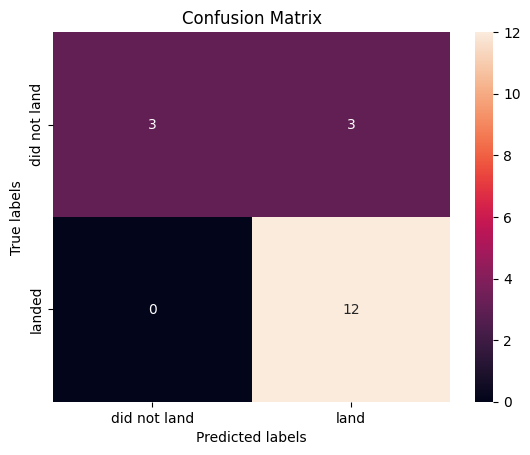

In [16]:
yhat=logreg_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the main problem is false positives.


## TASK  6


Next, we will create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  


In [17]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [18]:
svm_cv = GridSearchCV(svm, parameters, scoring = 'accuracy', cv=10)
svm_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [19]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
svm_best_score = svm_cv.best_score_
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [20]:
accuracy_svm = svm_cv.score(x_test, y_test)
print(f"Accuracy on the test data: {accuracy_svm:.2%}")

Accuracy on the test data: 83.33%


We can plot the confusion matrix


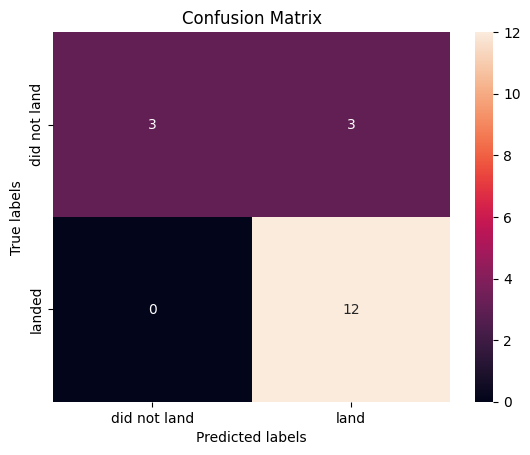

In [21]:
yhat=svm_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

This new model seemed to create the same results as the previous one. 

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code>.


In [32]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [33]:
gscv_tree_cv = GridSearchCV(tree, parameters, scoring='accuracy', cv=10)
tree_cv = gscv_tree_cv.fit(x_train, y_train)

/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

In [34]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
tree_best_score = tree_cv.best_score_
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8875


## TASK  9


Next, we'll calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [35]:
accuracy_tree = tree_cv.score(x_test, y_test)
print(f"Accuracy on the test data: {accuracy_tree:.2%}")

Accuracy on the test data: 88.89%


We can plot the confusion matrix


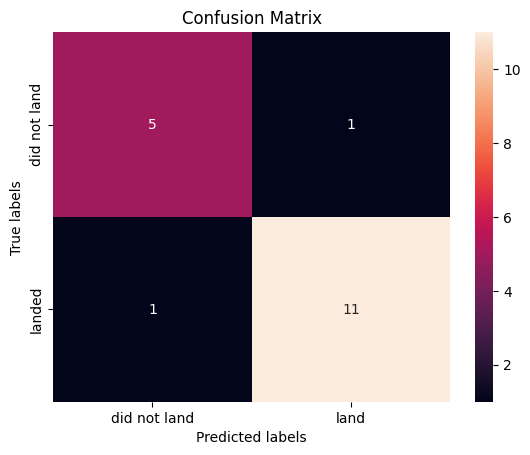

In [36]:
yhat = tree_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

Looking at the confusion matrix, this model has only one false positive, the rest of the matrix looks quite a bit better than the previous. 

## TASK  10


Let's try the k-nearest neighbor method. I'll create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code>.

In [37]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [38]:
gridsearch_cv_knn = GridSearchCV(KNN, parameters, scoring='accuracy', cv=10)
knn_cv = gridsearch_cv_knn.fit(x_train, y_train)

/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


In [39]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
knn_best_score = knn_cv.best_score_
print("accuracy :",knn_best_score)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Let's see the accuracy of knn_cv on the test data using the method <code>score</code>:


In [40]:
accuracy_k = knn_cv.score(x_test, y_test)
print(f"Accuracy on the test data: {accuracy_k:.2%}")

Accuracy on the test data: 83.33%


We can plot the confusion matrix


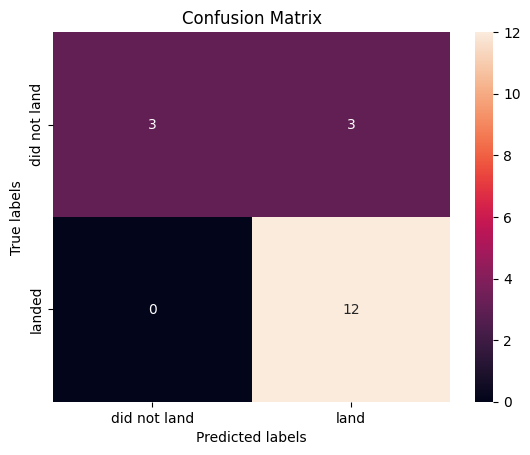

In [41]:
yhat = knn_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

## Task 12

Next we'll find which model performed best

In [42]:
algorithms = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbours']

scores = [accuracy, accuracy_svm, accuracy_tree, accuracy_k]

best_scores = [lr_best_score, svm_best_score, tree_best_score, knn_best_score]

column_names = ['Algorithm', 'Accuracy Score', 'Best Score']

In [43]:
df = pd.DataFrame(list(zip(algorithms, scores, best_scores)),columns = column_names)


In [44]:
df

,Algorithm,Accuracy Score,Best Score
0,Logistic Regression,0.833333,0.846429
1,Support Vector Machine,0.833333,0.848214
2,Decision Tree,0.888889,0.887500
3,K Nearest Neighbours,0.833333,0.848214


<ipython-input-45-596c0f5a3eba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=best_scores, palette="Blues")


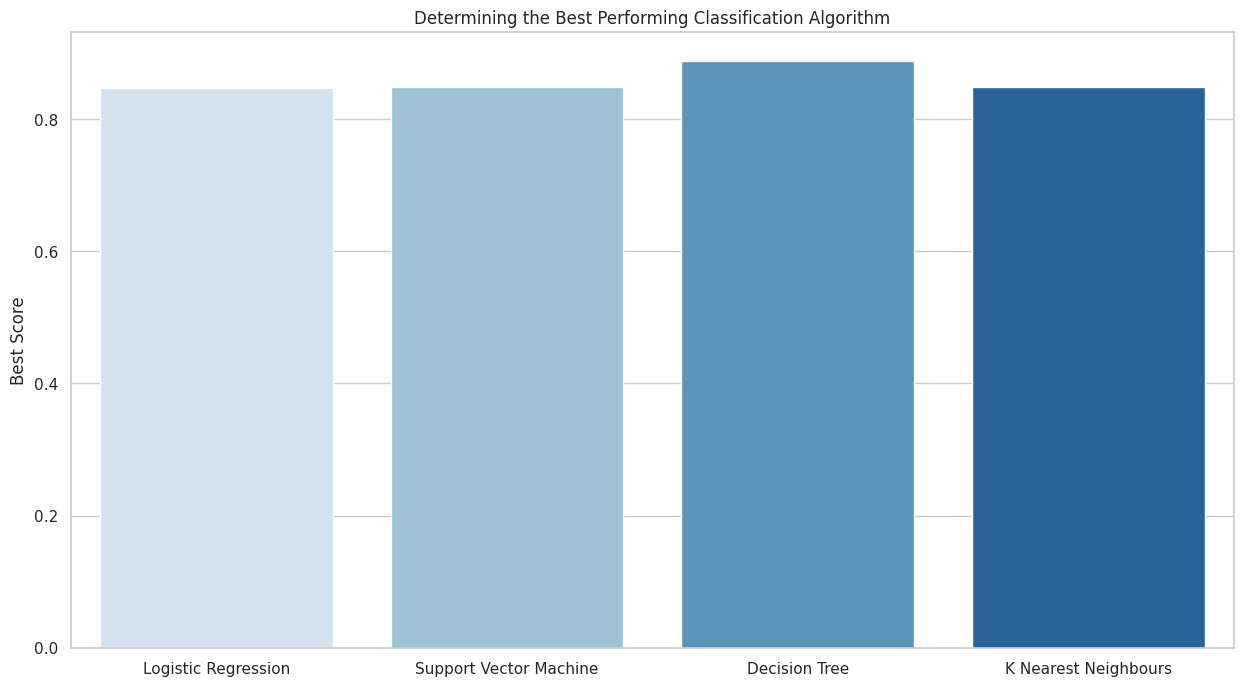

In [45]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,8))
sns.barplot(x=algorithms, y=best_scores, palette="Blues")
plt.title("Determining the Best Performing Classification Algorithm")
plt.ylabel("Best Score")
plt.show()

<ipython-input-46-65304a877787>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=scores, palette="Blues")


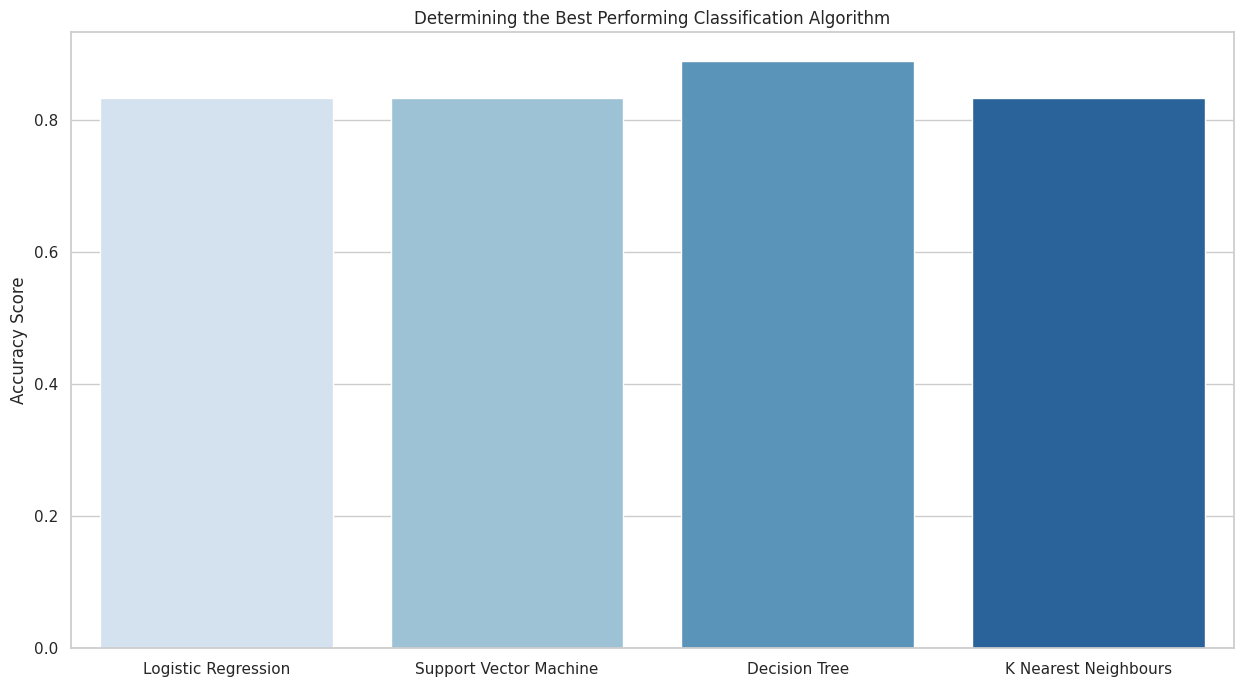

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(x=algorithms, y=scores, palette="Blues")
plt.title("Determining the Best Performing Classification Algorithm")
plt.ylabel("Accuracy Score")
plt.show()

### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
